# Linear Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("verisetix.csv", sep=";")

In [8]:
df

,experience,salary
0,0.5,2500
1,0.0,2250
2,1.0,2750
3,5.0,8000
4,8.0,9000
5,4.0,6900
6,15.0,20000
7,7.0,8500
8,3.0,6000
9,2.0,3500


Elimizle bir dataset hazırladık ve bu veriseti üzerinde linear regresyon algoritmasını uygulayacağız. Verisetimiz görselleştirelim ve verisetimizi yakından tanıyalım.

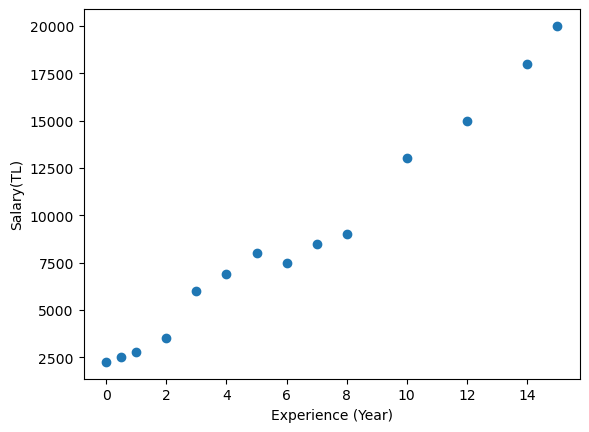

In [5]:
plt.scatter(df.experience, df.salary)
plt.xlabel("Experience (Year)")
plt.ylabel("Salary(TL)")
plt.show()

Linear regresyon bir regresyon algoritmasıdır. Peki Regesyon nedir? Sürekli verilerin tahmininde kullanılan bir algoritmadır. Sürekli veriler(Sayısal veriler.) Eğer ki verisetini yakından incelerseniz her iki değişken arasındaki ilişkiyi (Corelasyon) görmek mümkündür. Linear regresyonda bir model kurmak demek bu iki değişkenin ilişkisine uygun bir "line" bulabilmektir.

Datasetteki value'lara bir line fit etmektir. Buna "Fit a line to dataset observation"'dur. Biz bu line'i istediğimiz bir değeri predict yani tahmin etmek için kullanırız. Bu methoda "Line Fit" ya da "Linear Regression" methodu denir. 

#### Linear Regression


y= b0+ b1*x


b0===> constant/ bias

b1===> coefficient



b0 y eksenini kestiği noktadır. B1 ise oluşturacağımız line'in eğimidir. 


salary= b0+ b1*experience

Grafiğe göre
12500= 2500+1000*10   B0= 2500 B1=1000

experience= 11   salary=?

salary= b0+ b1*x ====> 2500+1000*11== 13500

Elimizde bir line var ve biz bu line'i fit edeceğiz. Elimizdeki tüm noktalara en yakın halinde geçmeli. Bu değeri bulabilmek yani değerlere en yakın line'ı çizebilmek için:


residual==> y-y_head

Y bizim gerçek değerimiz. y_head ise predict ettiğimiz değer. Yani aradaki fark  aslında bu line'ın maliyetidir. Residual'idir. 

Çizdiğimiz line ile gerçek değerlerin arasındaki fark benim hesaplamak istediğim asıl değer ve aslında bir mesafe hesapladığımızı unutmayalım. Yani çıkan negatif değerlerin Residual değerimi yanıltmasını istemediğimiz için Residual değerinin karesi alınır. Error değerlerimizi kaybetmek bizim problemimizi iyi etkilemez. Ardından tüm residual değerlerini toplarız. 

sum((Res)^2)/n


n değeri burada bizim sample sayısıdır. Yani elimizde kaç tane örnek value var ise o sayıya bölüp hesaplanan erroru ölçeklendiririz.


MSE=sum((Res)^2)/n

Bu hesaplamaya Mean Square Error deniyor. Line'mizin performansını ölçmek için kullanırız. Bizim amacımız en minimum MSE'yi bulmaktır. 


###### Amaçlarımız:

1. Modelimize en uygun line'ı bulabilmektir. (B0 ve B1 optimizasyonu)

2. Ardından MSE' yi hesaplamak.

3. MSE'yi minimum'a indirmektir. 





# Linear Regresyon With Python

In [9]:
# import data
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df= pd.read_csv("verisetix.csv", sep=";")

In [11]:
df

,experience,salary
0,0.5,2500
1,0.0,2250
2,1.0,2750
3,5.0,8000
4,8.0,9000
5,4.0,6900
6,15.0,20000
7,7.0,8500
8,3.0,6000
9,2.0,3500


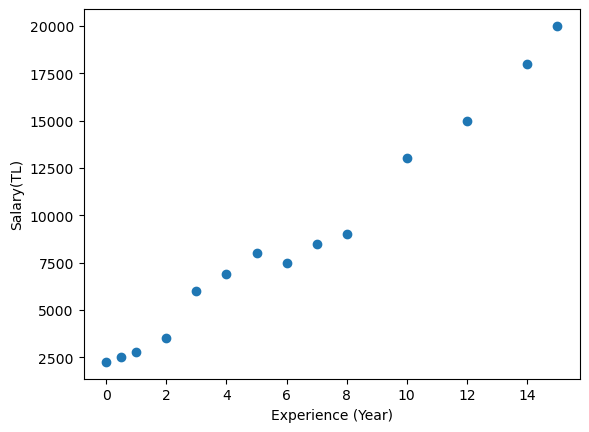

In [14]:
#plot data
plt.scatter(df.experience, df.salary)
plt.xlabel("Experience (Year)")
plt.ylabel("Salary(TL)")
plt.show()

Makine öğrenmesi algoritmalarının içinde bulunduğu kütüphane sklearn kütüphanesidir. 

In [15]:
#Linear Regression

#Sklearn Library
from sklearn.linear_model import LinearRegression


#Linear Regression Model
linear_reg= LinearRegression()


In [16]:
x= df.experience
y=df.salary

In [17]:
type(x)

pandas.core.series.Series

X ve Y nin Type'ı Series'dir. Fakat biz bu her iki ekseni numpy'a çevirelim. Çeviremek için .values opsiyonunu kullanırız.

In [18]:
x= df.experience.values
y=df.salary.values

In [19]:
x.shape

(14,)

In [20]:
y.shape

(14,)

Aslen (14,) (14,1) anlamına gelmektedir. Fakat Sklearn kütüphanesini kullanırken 1 boyutunun da temsili olmalıdır. 

In [23]:
x= df.experience.values.reshape(-1,1)
y=df.salary.values.reshape(-1,1)

In [24]:
x.shape

(14, 1)

In [25]:
y.shape

(14, 1)

###### Line Fit

Bizim Line'miz values'larımıza fit edildi.

In [27]:
linear_reg.fit(x,y)

LinearRegression()

Eğer B0 değerini görmek istersek: bunun iki yöntemi vardır bir x değerine 0 değerini vermek bir diğeri ise intercept (Kesişim) methodunu kullanabiliriz.

In [28]:
b0= linear_reg.predict([[0]])

In [30]:
print("B0 değeri: ",b0)

B0 değeri:  [[1663.89519747]]


In [32]:
b0_ = linear_reg.intercept_ #intercept

In [34]:
print("B0 değeri: ", b0_)

B0 değeri:  [1663.89519747]


B1 değerini bulmak istersek bilindiği üzere b1 x' in katsayısıydı. Coeff methodu ile b1 değerini görmek mümkündür.

In [35]:
b1= linear_reg.coef_ #slope

In [37]:
print("B1 değeri: ",b1)

B1 değeri:  [[1138.34819698]]


#### Predict

İstediğimiz herhangi bir değeri artık predict yapabilmeye başladık.

In [39]:
#Experience ==> 11
salary_new= 1663+1138*11

In [40]:
salary_new

14181

In [48]:
##Predict methodu ile
print(linear_reg.predict([[11]]))


[[14185.72536421]]


#### Görselleştirme

In [50]:
import numpy as np

In [57]:
array= np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]).reshape(-1,1)

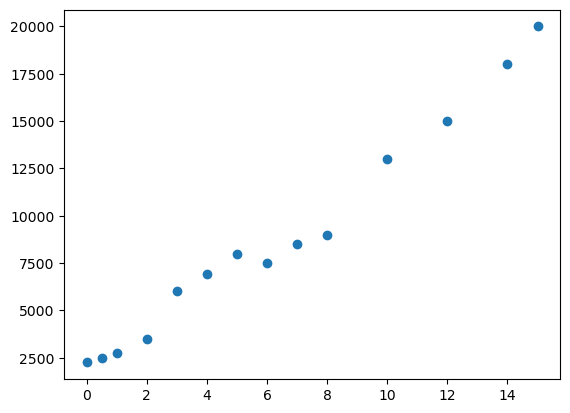

In [54]:
plt.scatter(x,y)

In [58]:
array.shape

(16, 1)

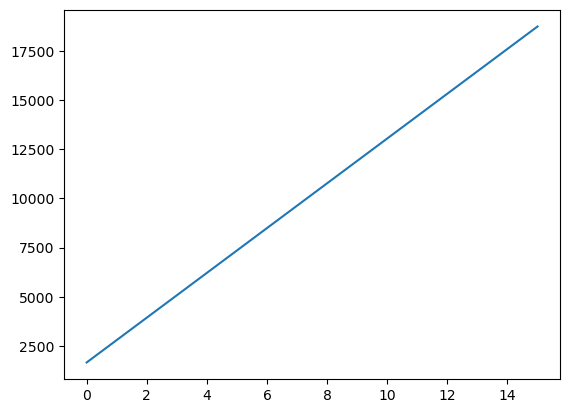

In [61]:
y_head=linear_reg.predict(array)
plt.plot(array, y_head)
